# Pymaceuticals Inc.
---

### Analysis

* The box plot charts show that mice treated with Capomulin and Ramicane have smaller final tumor volume than Infubionol and Ceftamin, suggesting that Capomulin and Ramicane are more successful drug treatments.

* The correlation chart between Weight of the mice and Average Tumor Volume suggests that the Capomulin drug is more effective for lighter mice. The heavier the mouse (in grams), the less effective the drug will be in reducing tumor size.

* Analyzing the results for a single mouse treated with Capomulin, the data suggests there is significant reduction in Tumor Volume after day 30, with possible relapse in growth after day 40. More samples will have to be taken to see if this trend is consistent with other subjects.
 

In [363]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
display(merged_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [364]:
# Checking the number of mice.
mice_count = merged_df["Mouse ID"].nunique()
mice_count

249

In [365]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[{"Mouse ID", "Timepoint"}].value_counts()
duplicate_mice

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [366]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.loc[merged_df["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [367]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merged_df.loc[merged_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [368]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [369]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
stats = clean_df.groupby(["Drug Regimen"])
mean = stats["Tumor Volume (mm3)"].mean()
median = stats["Tumor Volume (mm3)"].median()
variance = stats["Tumor Volume (mm3)"].var()
stddev = stats["Tumor Volume (mm3)"].std()
sem = stats["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({"Mean Tumor Volume": mean,
                        "Median Tumor Volume": median,
                        "Tumor Volume Variance": variance,
                        "Tumor Volume Std. Dev.": stddev,
                        "Tumor Volume Std. Err.": sem})
stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [370]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
agg_stats = pd.DataFrame(clean_df[["Drug Regimen","Tumor Volume (mm3)"]])
# Using the aggregation method, produce the same summary statistics in a single line.
agg_stats.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

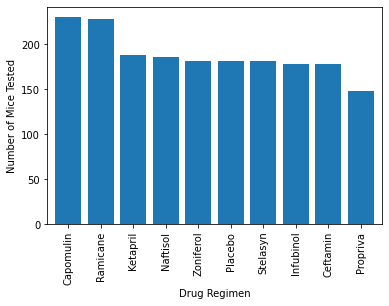

In [371]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas. 
#chart = clean_df[["Drug Regimen", "Timepoint"]]
count_drug_regimen = clean_df["Drug Regimen"].value_counts()
pandas_chart = count_drug_regimen.plot(kind='bar', figsize=(6,4), xlabel="Drug Regimen", ylabel="Number of Mice Tested", width=0.8)

plt.show()


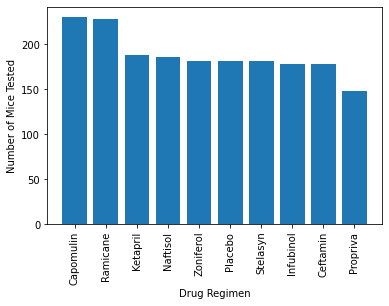

In [372]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(count_drug_regimen))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,4))
plt.bar(x_axis, count_drug_regimen, width=0.8)
plt.xticks(tick_locations, count_drug_regimen.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

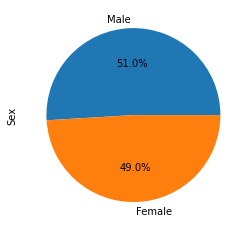

In [373]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()
pandas_pie = gender.plot(kind='pie', autopct="%1.1f%%")

plt.show()


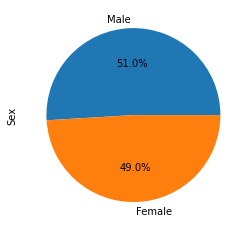

In [374]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels=gender.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [375]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#reduced_drug_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = clean_df.groupby(["Mouse ID"])
max_timepoint_df = timepoint_df[["Timepoint"]].max()
max_timepoint_df = max_timepoint_df.rename(columns={"Timepoint": "Max Timepoint"})
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(clean_df, max_timepoint_df, how='outer', on='Mouse ID')
final_volume_df = new_df.loc[(new_df["Timepoint"] == new_df["Max Timepoint"])].reset_index(drop=True)
final_volume_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,45,22.050126,1,45
1,s185,Capomulin,Female,3,17,45,23.343598,1,45
2,x401,Capomulin,Female,16,15,45,28.484033,0,45
3,m601,Capomulin,Male,22,17,45,28.430964,1,45
4,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0,5
244,z435,Propriva,Female,12,26,10,48.710661,0,10
245,z581,Infubinol,Female,24,25,45,62.754451,3,45
246,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [376]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    loop_df = final_volume_df.loc[(final_volume_df["Drug Regimen"] == treatment)]
    final_volume = loop_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(final_volume)
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr_1_5 = iqr * 1.5
    lower_bound = lowerq - iqr_1_5
    upper_bound = upperq + iqr_1_5
    
    print(f'IQR for {treatment}: {iqr}')
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = final_volume.loc[(final_volume_df["Tumor Volume (mm3)"] <= lower_bound) | (final_volume_df["Tumor Volume (mm3)"] >= upper_bound)]
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

    print(f"{treatment} potential outliers have Tumor Volumes below {round(lower_bound,6)} or above {round(upper_bound,6)}.")
    print(f"{treatment} potential outliers: {outliers}")
    print("-" * 100)
    

IQR for Capomulin: 7.781863460000004
Capomulin potential outliers have Tumor Volumes below 20.704562 or above 51.832015.
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------------------------------------------------
IQR for Ramicane: 9.098536719999998
Ramicane potential outliers have Tumor Volumes below 17.912664 or above 54.306811.
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------------------------------------------------------------------------------------
IQR for Infubinol: 11.477135160000003
Infubinol potential outliers have Tumor Volumes below 36.832905 or above 82.741446.
Infubinol potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
----------------------------------------------------------------------------------------------------
IQR for Ceftamin: 15.577752179999997
Ceftamin potential outliers have Tumor Volumes

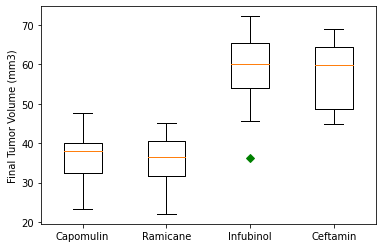

In [377]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_data, 0, 'gD')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

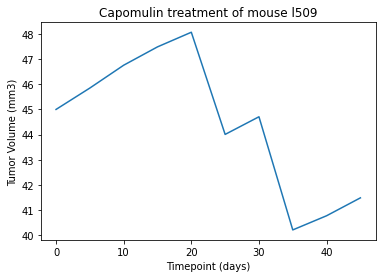

In [378]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_df = clean_df.loc[clean_df["Mouse ID"] == "l509"]
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


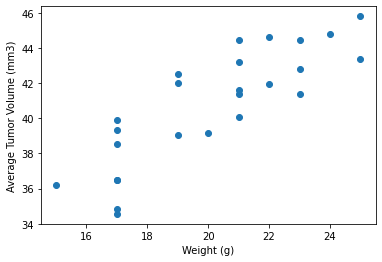

In [379]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

scatter_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
scatter_df = scatter_df.rename(columns={"Tumor Volume (mm3)" : "Avg Tumor Volume (mm3)"})

merged_scatter = pd.merge(mouse_metadata, scatter_df, on='Mouse ID')

x = merged_scatter["Weight (g)"]
y = merged_scatter["Avg Tumor Volume (mm3)"]
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


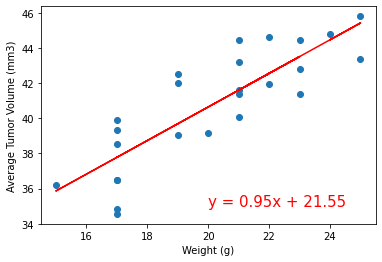

In [393]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
